### Autorki rozwiązania: Agnieszka Prudło i Aleksandra Krzemińska

# Podział pracy
Obie zrobiłyśmy wszystkie zadania, a następnie przedyskutowałyśmy rozwiązania i wybrałyśmy najbardziej dokładne i czytelne wersje.

### 1. Wczytanie i czyszczenie danych


In [1]:
import data_loader
import visualizations
import average_and_limits

In [2]:
# id archiwum dla poszczególnych lat  
years = [2015,2018,2021,2024] 
gios_url_ids = {2015: '236', 2018: '603', 2021: "486", 2024: '582'}
gios_pm25_file = {2015: '2015_PM25_1g.xlsx', 2018: '2018_PM25_1g.xlsx', 2021: '2021_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

data = data_loader.download_multiple_gios_archives(years, gios_url_ids, gios_pm25_file)

In [3]:
# usuwanie niepotrzebnych wierszy
# ujednolicanie struktury danych

data_edited = data_loader.edit_df(data)

In [4]:
# pobieranie metadanych stacji pomiarowych

# url metadanych
gios_metadata_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/622"
gios_metadata = data_loader.download_gios_metadata(gios_metadata_url)

In [5]:
# mapowanie starych kodów stacji na nowe

data_edited = data_loader.create_code_map(gios_metadata, data_edited)

In [6]:
# tworzymy MultiIndex

data_multiindex = data_loader.multiindex_code_city(data_edited, gios_metadata)

In [7]:
# korekta indeksu daty i godziny (przesunięcie rekordów o 00:00:00 na poprzedni dzień)

data_multiindex_corrected = data_loader.correct_datetime_index(data_multiindex)

In [8]:
# scalenie danych z poszczególnych lat, zapis do pliku CSV i kontrola poprawności
df_all = data_loader.save_combined_data(data_multiindex_corrected, "poziom_zanieczyszczeń.csv")

# sprawdzenie wyglądu scalonych danych
df_all.head()

Miejscowość                    X                                         \
Kod stacji          DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna   
2015-01-01 01:00:00      151.112         78.0      50.0000         29.2   
2015-01-01 02:00:00      262.566         42.0      33.8244         27.1   
2015-01-01 03:00:00      222.830         27.0      28.7215          7.9   
2015-01-01 04:00:00      210.767         24.0      20.6891          7.1   
2015-01-01 05:00:00      191.211         22.0      22.5335          9.2   

Miejscowość                                                              \
Kod stacji          KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
2015-01-01 01:00:00         95.5      71.1012        59.73    58.690689   
2015-01-01 02:00:00         86.1      95.2582       185.92    44.501255   
2015-01-01 03:00:00         23.8      49.5078        54.25    24.163937   
2015-01-01 04:00:00         15.9      60.8468        50.15    19.516039   
2015-01-01 05:00:00         15.0      49.3106        39.17    16.850332   

Miejscowość                                    ...                            \
Kod stacji          LuZielKrotka MpKrakAlKras  ... PdBialUpalna PkPrzemGrunw   
2015-01-01 01:00:00          NaN         73.0  ...         67.0      18.9027   
2015-01-01 02:00:00      51.8628         55.0  ...        103.0      15.9257   
2015-01-01 03:00:00      15.8660         61.0  ...         49.0      16.1709   
2015-01-01 04:00:00      20.1187         62.0  ...         37.0      16.0252   
2015-01-01 05:00:00      27.3413         57.0  ...         27.0      15.5498   

Miejscowość                                                              \
Kod stacji          PmGdaLeczkow PmKosTargowa SlKatoKossut SlZlotPotLes   
2015-01-01 01:00:00          NaN          NaN       51.389      49.9464   
2015-01-01 02:00:00     75.52780          NaN       37.709      45.6291   
2015-01-01 03:00:00      8.87389          NaN       41.984      49.2093   
2015-01-01 04:00:00      8.83194      22.7895       45.404      53.3160   
2015-01-01 05:00:00      6.56750          NaN       36.854      51.5259   

Miejscowość                                                              
Kod stacji          WmOlsPuszkin WpKaliSawick ZpSzczAndrze ZpSzczPilsud  
2015-01-01 01:00:00    44.060833         25.5          NaN          NaN  
2015-01-01 02:00:00    49.943329         32.5      81.8501     215.3790  
2015-01-01 03:00:00    20.688448         24.3      25.7333      27.7458  
2015-01-01 04:00:00    17.437717         24.4      18.6240      26.5201  
2015-01-01 05:00:00    15.532262         25.0      17.6545      31.0393  

[5 rows x 30 columns]

### 2. Średnie miesięczne + trend dla miast

In [9]:
# obliczanie średnich miesięcznych dla każdego roku i stacji

monthly_df = average_and_limits.monthly_mean(df_all)
monthly_df

Miejscowość             X                                                      \
Kod stacji   DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna KpBydWarszaw   
rok  miesiąc                                                                    
2015 1          24.504821    32.921321    27.863459    21.016268    25.890511   
     2          41.859821    45.884722    42.238897    45.497710    49.939606   
     3          28.603600    35.995391    32.581978    33.105139    24.413016   
     4          12.323373    19.873433    15.131175    16.357370          NaN   
     5           8.716385    18.487889    13.339719    12.793215    12.668022   
     6           7.791419    18.227356    11.718465     9.976331     9.767814   
     7           6.879472    18.914791    12.158851    10.189889     9.693838   
     8          11.131890    25.153938    18.316188    14.717009    13.796165   
     9           7.141748    19.981177    12.324672    14.417414    14.056662   
     10         23.644826    43.910344    32.489062    35.277361    35.401508   
     11         25.710537    49.637270    43.717427    30.462654    35.870557   
     12         22.893786    34.432793    27.114146    21.933659    30.398732   
2018 1          21.121368    25.598823    25.810687    35.005226    38.350731   
     2          38.070286    45.710670    46.228103    51.506631    48.145126   
     3          35.997834    38.456314    37.214785    45.066158    56.718008   
     4          13.830232    20.700946    18.597148    23.143182    23.061890   
     5          16.161816    16.648540    13.897815    14.156190    15.869706   
     6          13.660109    12.446891    11.547937    12.679838    13.462054   
     7          12.584755    12.095556    10.648858    15.579521    15.000154   
     8          10.960227    12.919487    11.245645    15.657619    16.765751   
     9          14.683143    14.760631    12.584673    16.402166    15.397947   
     10         22.092889    23.661113    21.446295    29.950907    29.287297   
     11         38.153154    34.874046    33.884764    43.474770    43.248240   
     12         19.222373    23.230754    23.156903    27.937650    30.860461   
2021 1          29.901718    29.350533    26.805180    29.057314    22.569471   
     2          34.237084    37.239144    33.639402    41.737349    35.387199   
     3          26.880032    26.893210    23.261149    21.834110    17.558663   
     4          16.038263    16.848903    14.380061    13.227994    11.464154   
     5           8.564051    11.310791     8.337058     5.459014     7.917876   
     6          12.918083    16.228332    12.795795     6.943228     9.429378   
     7          10.734240    13.914004    11.201217    10.412534    10.864631   
     8           8.095207    11.171375     8.401480     5.696176     7.922703   
     9          12.849123    16.687761    12.654480     8.778571    10.094299   
     10         19.165852    19.799261    16.197655    14.645270    15.820652   
     11         26.115729    25.541943    23.671301    16.429630    17.225452   
     12         35.768634    29.465271    28.076707    23.367275    23.207163   
2024 1          23.274866    24.596505    20.246909    17.465593    19.892946   
     2          13.506178    16.553401    14.030460    14.689098    16.090374   
     3          19.934320    24.241184    21.038172    23.096828    23.358587   
     4           9.886528    11.894437     9.803616    11.310778    10.433705   
     5           8.234677    11.041256     9.184274    10.873099     9.573634   
     6           9.513333    10.509471     9.429624     8.961730     9.074722   
     7           7.453763     9.097690     8.482930     7.758732     7.722911   
     8           9.372581    11.574059    13.286649     9.209726     9.179772   
     9          11.491155    13.114571    15.856825    12.913372    13.917500   
     10         13.677898    15.125575    17.468817    13.104191    17.466622   
     11         20.962500    20

In [13]:
# grupowanie po miastach oraz liczenie średiej dla miast 
monthly_df_grouped = monthly_df.groupby(level=0, axis=1).mean()
monthly_df_grouped

/tmp/ipykernel_30303/3663581315.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_df_grouped = monthly_df.groupby(level=0, axis=1).mean()


Miejscowość           X
rok  miesiąc           
2015 1        28.257815
     2        47.207630
     3        35.854077
     4        18.108868
     5        14.670158
     6        12.346108
     7        11.664292
     8        17.467287
     9        15.073524
     10       34.911832
     11       35.021897
     12       27.281331
2018 1        30.535041
     2        42.276338
     3        39.089704
     4        19.035234
     5        13.951059
     6        12.482929
     7        12.633471
     8        13.000346
     9        15.348862
     10       26.077052
     11       37.152779
     12       26.017086
2021 1        29.954561
     2        37.304607
     3        24.589528
     4        15.780426
     5         9.255042
     6        12.078470
     7        12.171922
     8         9.199866
     9        12.592750
     10       18.665937
     11       21.787878
     12       26.778878
2024 1        20.724406
     2        16.140075
     3        23.593344
     4        12.359497
     5        10.745305
     6        10.625108
     7         9.031520
     8        10.985600
     9        14.651489
     10       15.871280
     11       18.870330
     12       20.553090

In [14]:
# wykres porównujący średnie miesięczne poziomy PM2.5 w Warszawie i Katowicach w 2014 i 2024 roku

visualizations.plot_average(monthly_df_grouped, [2015, 2024], ['Warszawa', 'Katowice'])

KeyError: "None of [Index(['Warszawa', 'Katowice'], dtype='object', name='Miejscowość')] are in the [columns]"

# Opis

W roku 2015 zanieczyszczenie powietrza było wyższe niż w 2024 zarówno w Warszawie jak i w Katowicach. Krzywe wskazują również na większe zanieczyszecznie powietrza zimą, co może być spowodowane zwiększonym zapotrzebowaniem energetycznym. W Katowicach poziom zanieczyszczeń w każdym roku jest wyższy niż w Warszawie. Może to być spowodowane faktem, że Katowice są miastem górniczym. Co ciekawe, w roku 2015 luty był najbardziej zanieczyszczonym miesiącem w obu miastach, a w 2024 nie obserwujemy już takiego zjawiska. Wykres pokazuje, że w ciągu ostatnich lat stan powietrza poprawił się.

### 3. Heatmapa miesięcznych średnich

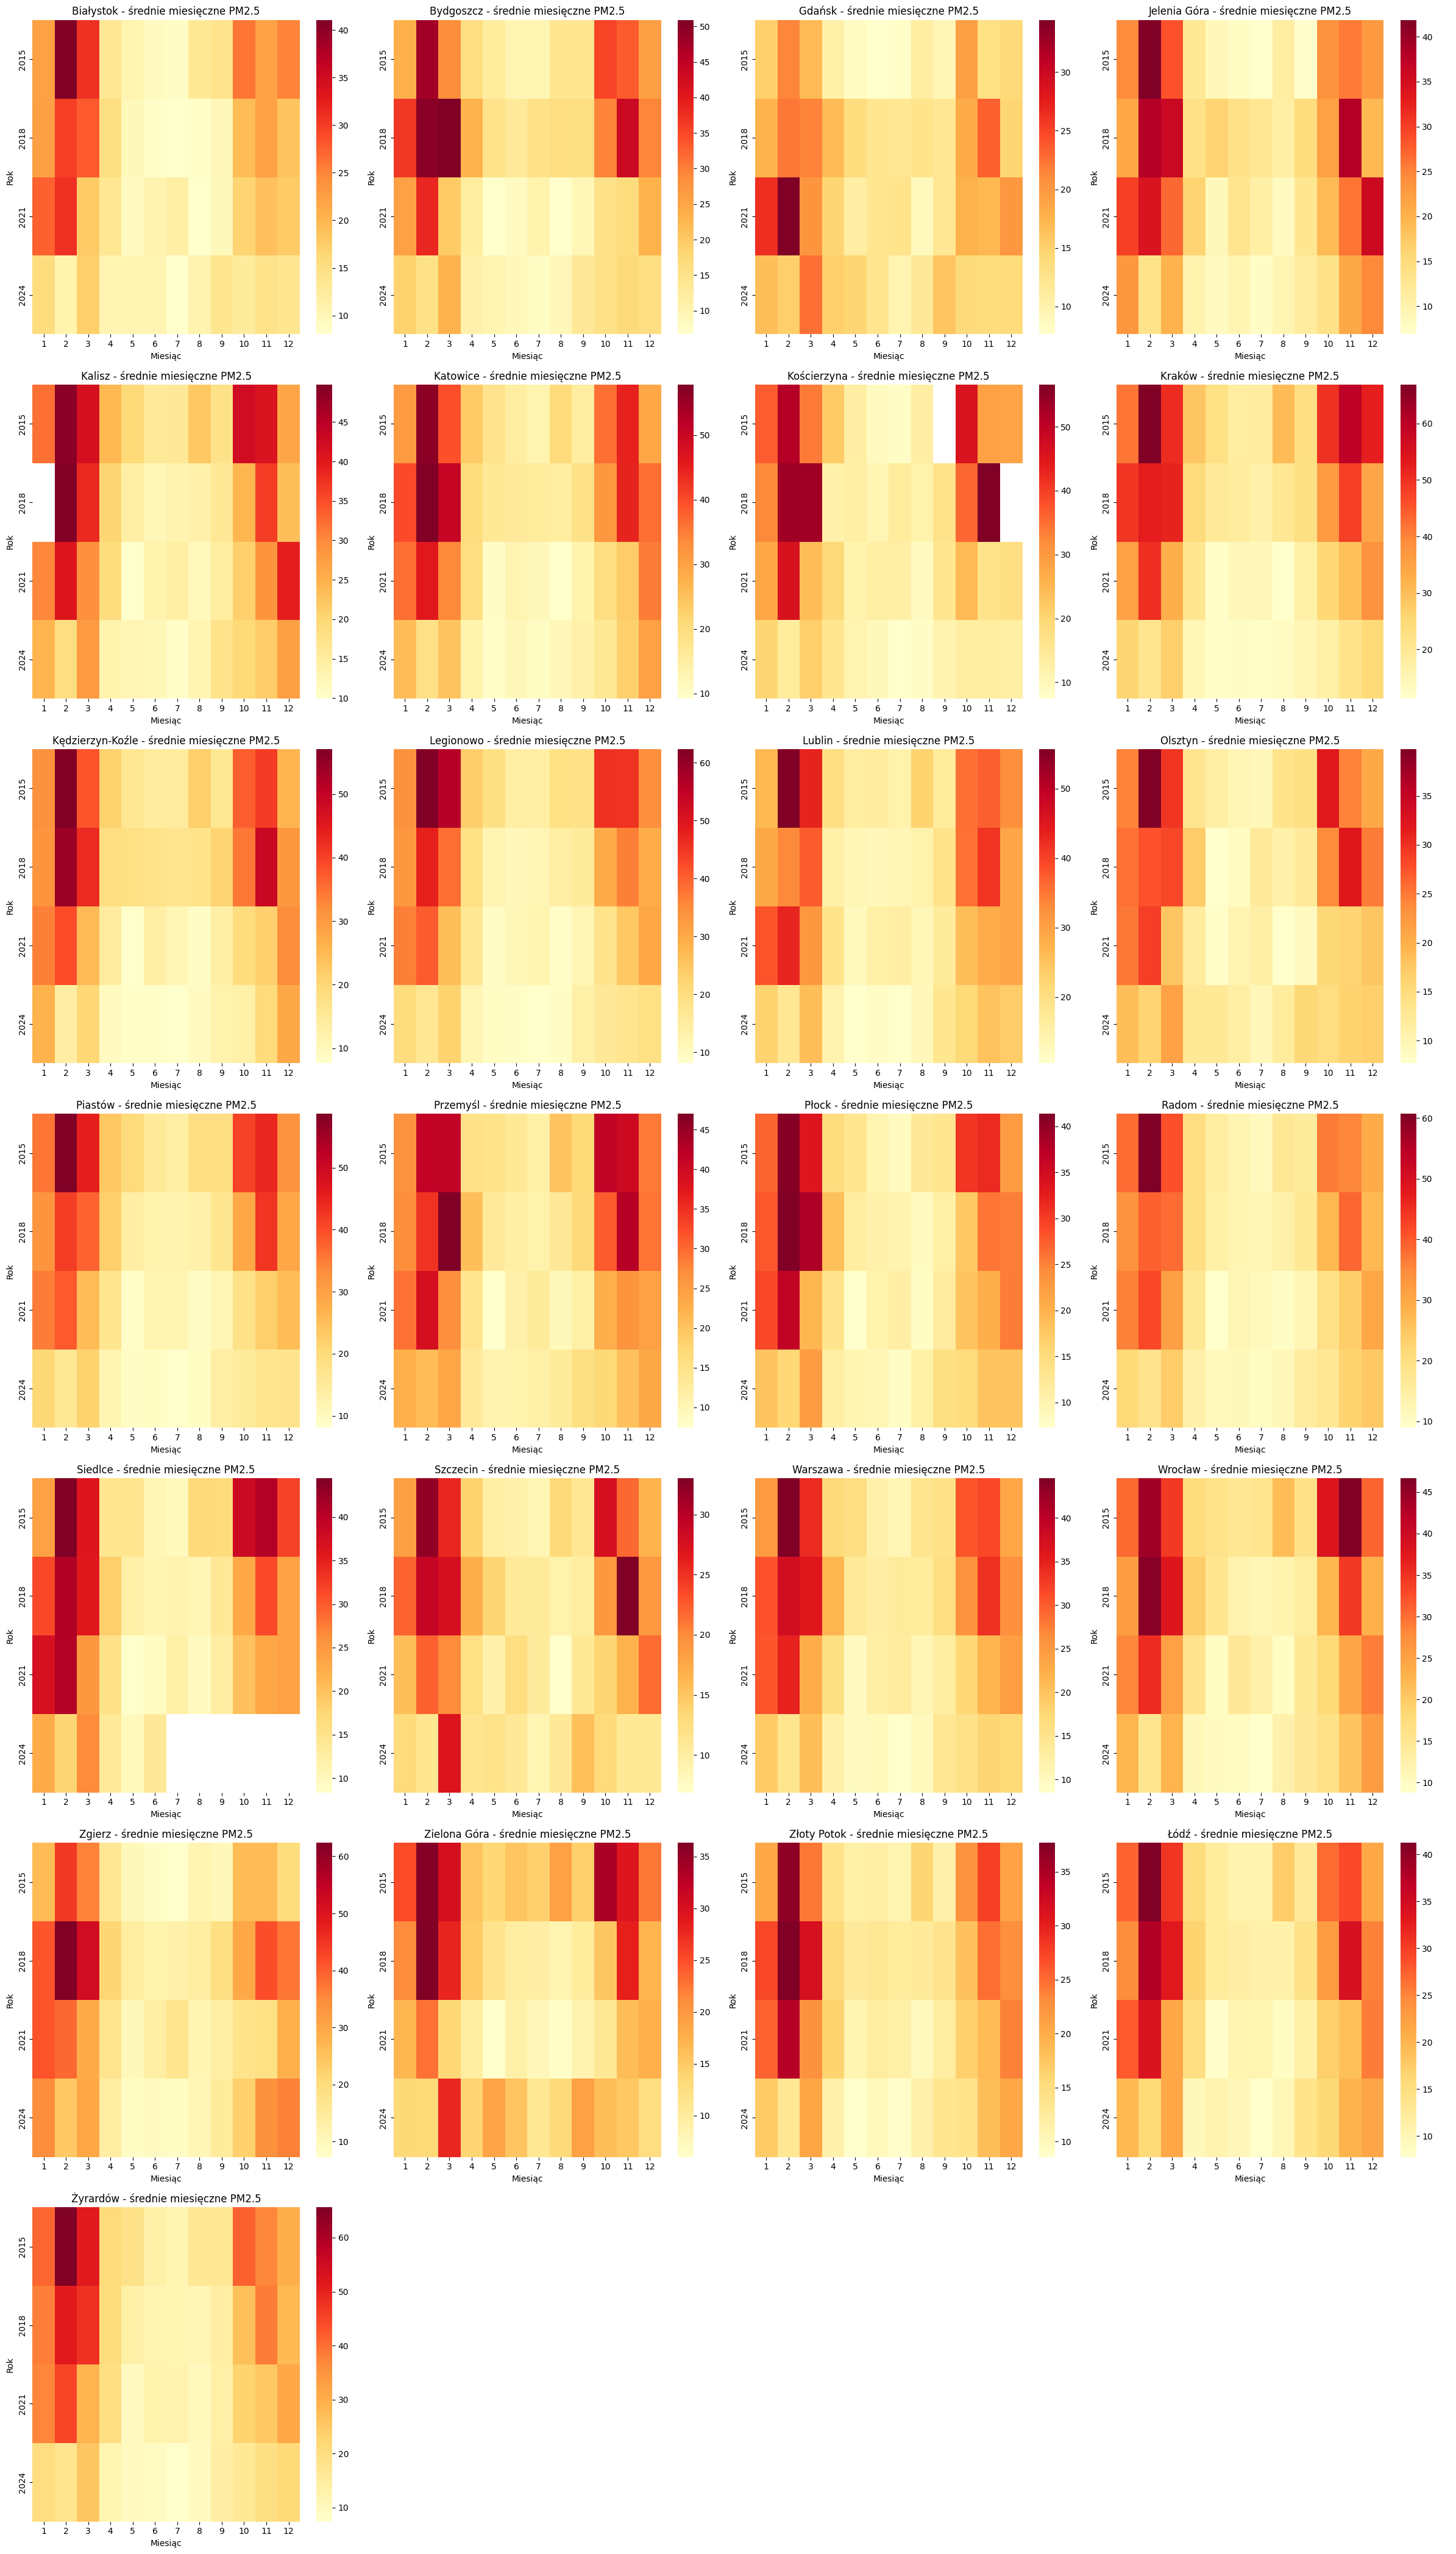

In [19]:
visualizations.heatmaps(monthly_df_grouped)

# Opis

Na wykresach widać duże różnice w zanieczyszczeniach w zależności od pory roku: w miesiącach zimowych jest ono wyższe, szczególnie w latach wcześniejszych. Wynika to prawdopodobnie z konieczności ogrzewania budynków i większego zapotrzebowania na energię. Widać także, że w późniejszych latach ogólne zanieczyszczenie jest niższe- stan powietrza z roku na rok się poprawia.

Zauważalny jest także brak danych dla Siedlec w drugiej połowie 2024 roku.

### 4. Dni z przekroczeniem normy (WHO)

In [19]:
norms_df = average_and_limits.find_above_norm(df_all, years=years, sort_by=2024, norm=15)
norms_df

2015  2018  2021  2024
Miejscowość Kod stacji                          
X           ZpSzczAndrze   113   106    95    72
            PdBialUpalna   158   135   137    76
            MzSiedKonars   229   205   177    79
            PmKosTargowa   177   143   169   102
            MzWarWokalna   210   226   151   102
            KpBydPlPozna   187   239   125   108
            DsJelGorOgin   144   198   162   109
            OpKKozBSmial   265   281   178   111
            SlZlotPotLes   173   192   179   117
            MzLegZegrzyn   273   218   168   121
            KpBydWarszaw   163   238   119   123
            MzPiasPulask   297   237   185   124
            LdLodzCzerni   201   205   175   128
            ZpSzczPilsud   168   194   117   130
            DsWrocWybCon   197   196   157   130
            MzPlocMiReja   191   169   156   131
            DsWrocAlWisn   308   232   211   134
            PmGdaLeczkow    97   150   138   139
            WmOlsPuszkin   180   190   130   139
            MzZyraRoosev   256   230   200   142
            LuZielKrotka   225   144    92   145
            PkPrzemGrunw   238   225   180   146
            MpKrakBulwar   287   220   223   152
            MzWarAlNiepo   235   253   224   152
            MzRadTochter   240   250   194   161
            WpKaliSawick   268   197   209   163
            SlKatoKossut   267   285   214   165
            LbLubObywate   276   234   246   170
            MpKrakAlKras   344   343   250   178
            LdZgieMielcz   175   251   201   189

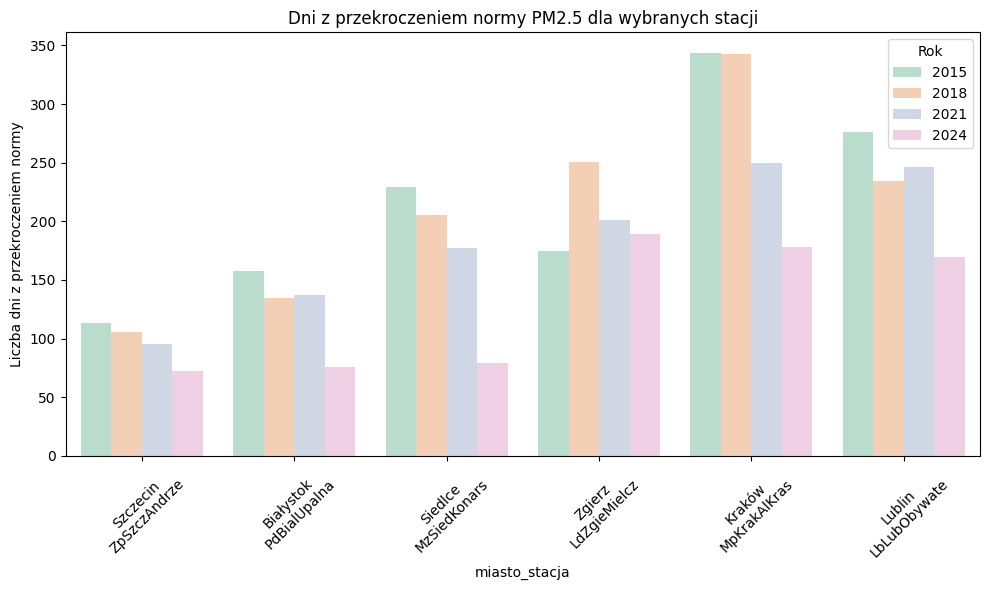

In [14]:
visualizations.bar_plots(norms_df, year=2024)

# Opis

Na wykresie widać, że w większości stacji z roku na rok nastepuje zmniejszenie liczby dni w których została przekroczona norma, co sugeruje poprawę jakości powietrza. Jedyną stacją nie wykazującą poprawy jest Stacja w Zgierzu. Dla Siedlec zanotowano jeden z najniższych wyników w 2024 roku, co prawdopodobnie spowodowane jest brakiem danych pomiarowych z drugiej połowy tego roku (w praktyce nie powinniśmy brać pod uwagę danych z tej stacji, ponieważ nie oddają rzeczywistego stanu sytuacji). Najwięcej dni z przekroczniem normy notuje się w Zgierzu, Krakowie i Lublinie, co wskazuje na poważny problem w tych miastach. Mimo spadków wlatach 2015-2024, liczba dni z przekroczeniami norm pozostaje istotna, co pokazuje potrzebę kontynuowania działań poprawiających jakość powietrza.

## Zadanie 5

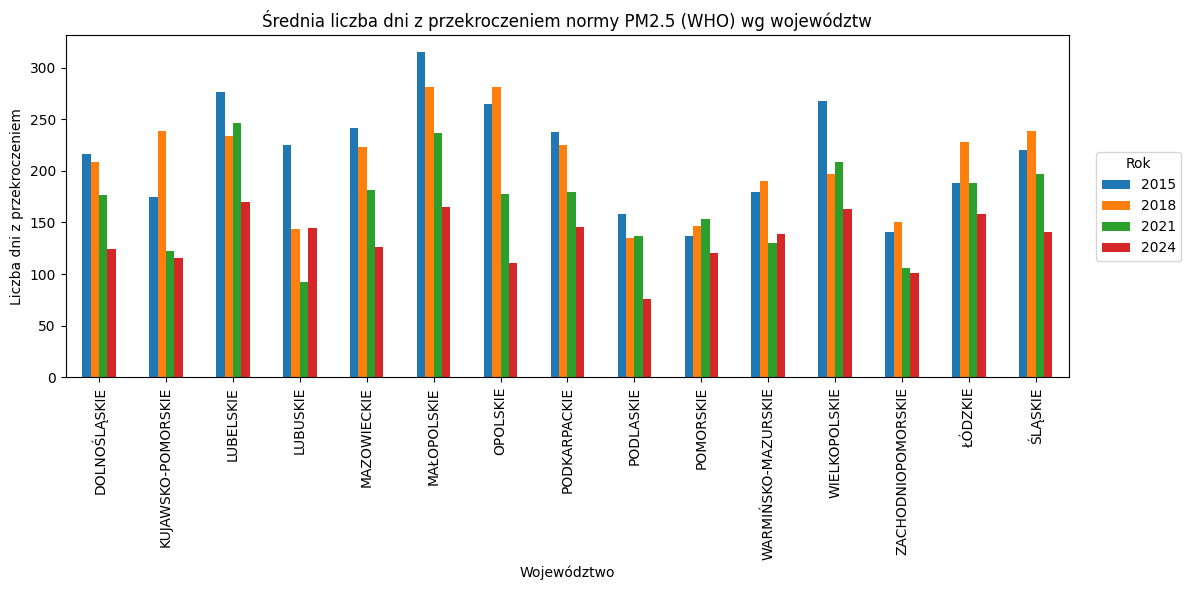

In [48]:
metadata=data_loader.prepare_station_metadata(gios_metadata)
voiv_df = voivodeship_exceedances(norms_df, metadata) 
fig = plot_voivodeship_exceedances(voiv_df)

### opis
Wykres przedstawia średnią liczbę dni z przekroczeniem normy PM2.5 (WHO) z podziałem na województwa dla lat 2015, 2018, 2021 i 2024.
Zastosowanie średniej pozwala na rzetelne porównanie województw, eliminując wpływ różnej liczby stacji pomiarowych.
Najmniejsze wartości obserwujemy w województwach: podlaskim, pomorskim i zachodniopomorskim.

We wszystkich województwach widoczny jest trend spadkowy liczby dni z przekroczeniem normy w latach 2015–2024, co sugeruje stopniową poprawę jakości powietrza.  W większości województw najwięcej dni z przekroczeniem normy było w 2015, a najmniej w 2024 roku.